http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [1]:
import torch

In [2]:
torch.__version__

'0.4.1'

In [3]:
x = torch.Tensor(5, 3)
x

tensor([[ 0.0000e+00, -8.5899e+09, -6.4389e+27],
        [-1.5849e+29,  1.7718e+28,  6.5885e+22],
        [ 1.2623e-14,  1.8888e+31,  1.2712e+31],
        [ 5.1164e-14,  1.6109e-19,  1.8888e+31],
        [ 4.1051e-41,  0.0000e+00, -1.6262e+16]])

In [4]:
print(x.size())

torch.Size([5, 3])


In [5]:
from torch.autograd import Variable

In [6]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [7]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [8]:
print(y.grad_fn)

In [9]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [10]:
out.backward()

In [11]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Training a classifier
http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  dog  bird   car truck


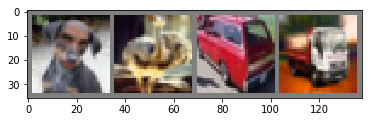

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

/Users/robincole/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 2.186
[1,  4000] loss: 1.849
[1,  6000] loss: 1.685
[1,  8000] loss: 1.585
[1, 10000] loss: 1.529
[1, 12000] loss: 1.488
[2,  2000] loss: 1.421
[2,  4000] loss: 1.368
[2,  6000] loss: 1.380
[2,  8000] loss: 1.334
[2, 10000] loss: 1.336
[2, 12000] loss: 1.315
[3,  2000] loss: 1.235
[3,  4000] loss: 1.242
[3,  6000] loss: 1.226
[3,  8000] loss: 1.231
[3, 10000] loss: 1.205
[3, 12000] loss: 1.201
[4,  2000] loss: 1.100
[4,  4000] loss: 1.136
[4,  6000] loss: 1.122
[4,  8000] loss: 1.120
[4, 10000] loss: 1.135
[4, 12000] loss: 1.113
[5,  2000] loss: 1.029
[5,  4000] loss: 1.044
[5,  6000] loss: 1.043
[5,  8000] loss: 1.046
[5, 10000] loss: 1.046
[5, 12000] loss: 1.064
Finished Training
CPU times: user 2min 10s, sys: 21.7 s, total: 2min 32s
Wall time: 2min 18s


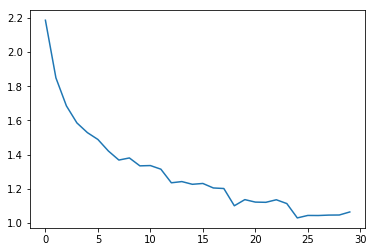

In [17]:
%%time
loss_record = []

epochs = 5

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            loss_record.append(running_loss/ 2000)
            running_loss = 0.0

print('Finished Training')
plt.plot(loss_record)

GroundTruth:    cat  ship  ship plane


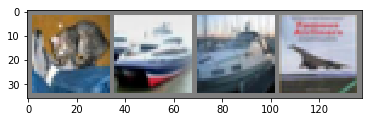

In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
outputs = net(Variable(images))

In [20]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship truck plane


In [21]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


## Accuracy vs epochs
* 2 epochs - Accuracy of the network on the 10000 test images: 53 %, Wall time: 57 s
* 5 epochs - Accuracy of the network on the 10000 test images: 62 %, Wall time: 2min 18s